# 数据分析
@author karlieswift

In [1]:
#导入包
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train_data=pd.read_csv('../input/train.csv')
test_data=pd.read_csv('../input/test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train_data.info()  #具体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
#查看数据是否又缺少
sum(np.array(train_data.isnull().sum()!=0))

19

##### 有19个缺失值

## 观察各项特征与房价的关系
#### 可视化分析

In [4]:
train_data.describe()
#查看数值型的统计特征

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 查看房价的特征

In [7]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


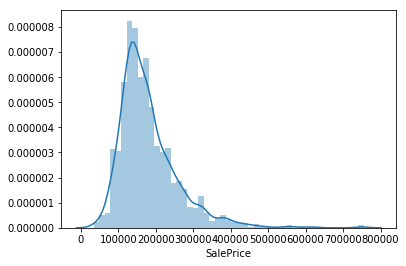

In [8]:
#查看价格
sns.distplot(train_data['SalePrice'])

#### 可知房价称正态分布

In [9]:
train_data.columns
#所有特征

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 分析最有用的特征，LotArea地皮面积，GrLivArea生活面积，TotalBSmF地下室面积，MiscVal其他资产，GarageArea车库，YaerBuilt建造年份，CentralAir中央空调，Overallqual总体评价，NeighborHood地段

### 1——CentralAir中央空调

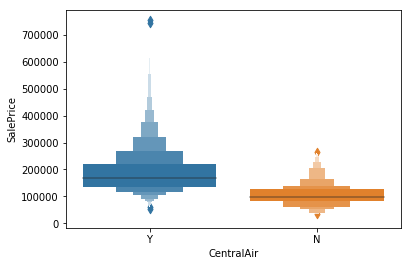

In [10]:
var='CentralAir'
data=pd.concat([train_data[var],train_data['SalePrice']],axis=1)
fig=sns.boxenplot(y='SalePrice',x=var,data=train_data)

#### 可以看出有CentralAir中央空调价格更高
### 2——OverallQual总体评价

In [11]:
train_data['OverallQual'].unique() #种类即评价等级

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

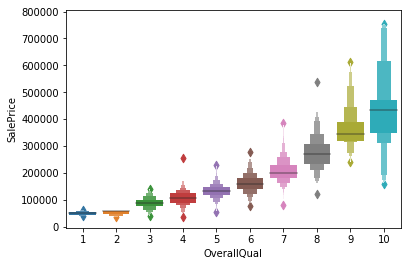

In [12]:
var='OverallQual'
data=pd.concat([train_data[var],train_data['SalePrice']],axis=1)
fig=sns.boxenplot(y='SalePrice',x=var,data=train_data)

#### 等级越高价格越高

### 3——YearBuild建造年分

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

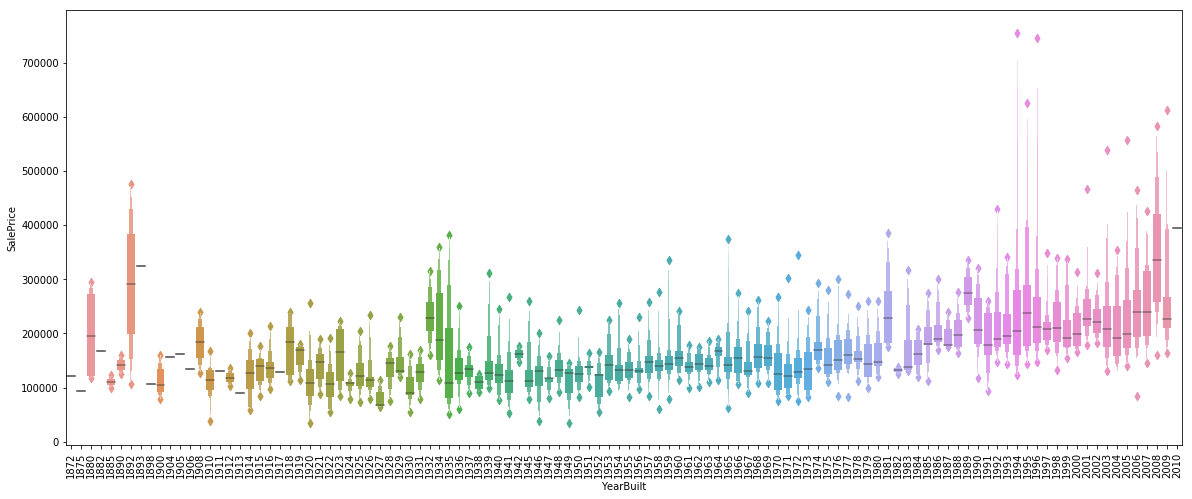

In [13]:
fig,ax1=plt.subplots(figsize=(20,8))
var='YearBuilt'
data=pd.concat([train_data[var],train_data['SalePrice']],axis=1)
sns.boxenplot(y='SalePrice',x=var,data=train_data,ax=ax1)
plt.xticks(rotation=90)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

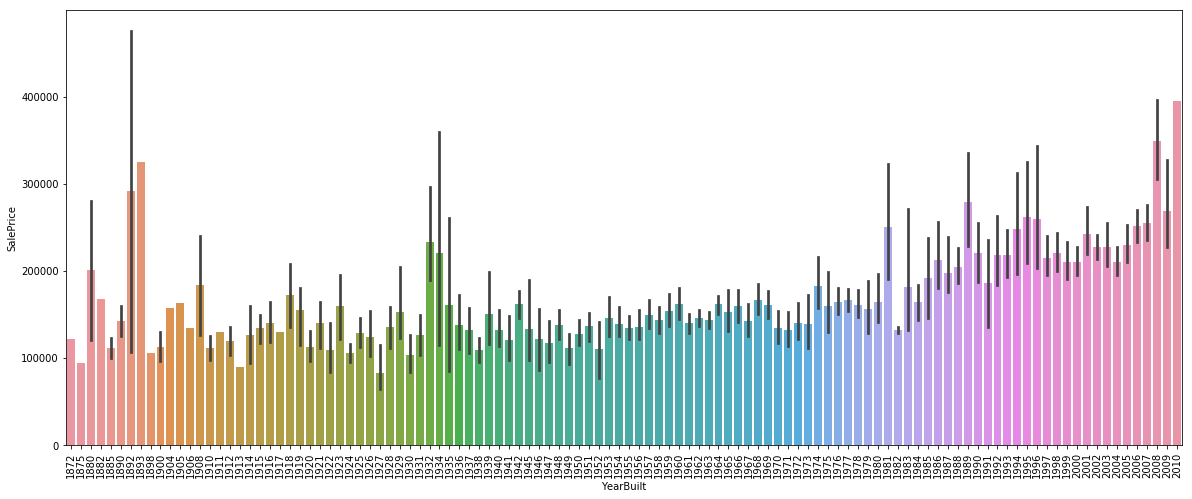

In [14]:
fig,ax1=plt.subplots(figsize=(20,8))
var='YearBuilt'
data1=pd.concat([train_data[var],train_data['SalePrice']],axis=1)
fig1=sns.barplot(y='SalePrice',x=var,data=data1)
plt.xticks(rotation=90)

(array([1860., 1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020.]),
 <a list of 9 Text xticklabel objects>)

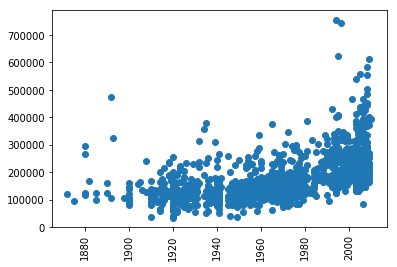

In [15]:
var='YearBuilt'
data=pd.concat([train_data[var],train_data['SalePrice']],axis=1)
plt.scatter(y='SalePrice',x=var,data=data)
plt.xticks(rotation=90)

#### TotalBsmtSF地下室面积

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


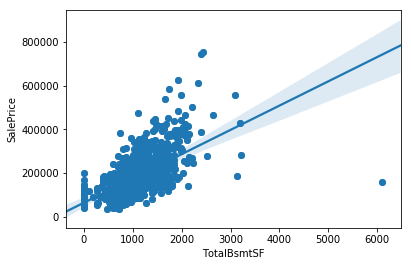

In [16]:
var='TotalBsmtSF'
plt.scatter(train_data[var],train_data['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
sns.regplot(train_data[var],train_data["SalePrice"])

## 去掉一些异常值

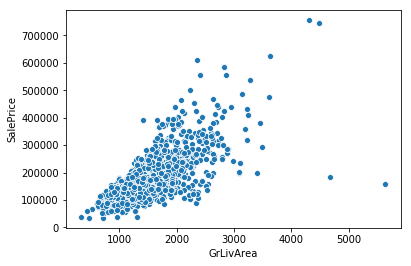

In [17]:
fig=sns.scatterplot(y='SalePrice',x='GrLivArea',data=train_data)

In [18]:
#删除没用的值
train_data.drop(train_data[(train_data['GrLivArea']>4000) | (train_data['SalePrice']>600000)].index,inplace=True)

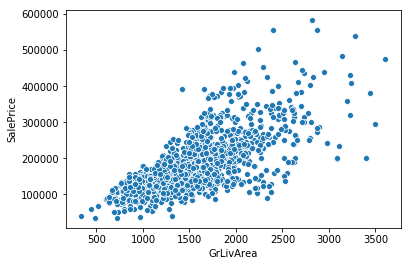

In [19]:

fig=sns.scatterplot(y='SalePrice',x='GrLivArea',data=train_data)

## 绘制热度图

In [20]:
corrmat=train_data.corr()  #相关系数矩阵
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011272,-0.027957,-0.040061,-0.035129,0.013860,-0.014963,-0.023826,-0.060725,-0.020691,-0.005325,-0.006701,-0.030865,-0.000549,0.000384,-0.044027,-0.004421,-0.002129,-0.019491,0.001905,0.004030,0.036122,0.003434,0.021631,-0.025767,-0.002067,0.014170,0.011703,-0.032039,-0.002888,0.003707,-0.046445,0.001944,0.040946,-0.006054,0.023429,0.001324,-0.033958
MSSubClass,0.011272,1.000000,-0.408997,-0.142534,0.033702,-0.059587,0.028429,0.041198,0.025266,-0.073505,-0.065778,-0.141545,-0.255003,-0.264482,0.312016,0.046446,0.079377,0.003897,-0.002641,0.132858,0.178385,-0.024363,0.281750,0.041999,-0.045197,0.085755,-0.039667,-0.099444,-0.013436,-0.006522,-0.012168,-0.043878,-0.026135,0.007927,-0.007716,-0.014275,-0.020315,-0.087083
LotFrontage,-0.027957,-0.408997,1.000000,0.384070,0.220530,-0.054357,0.111605,0.077848,0.149951,0.126764,0.057919,0.143781,0.308897,0.394888,0.045179,0.043069,0.335859,0.071679,-0.008789,0.182607,0.033546,0.269691,-0.002330,0.325931,0.235560,0.055696,0.285850,0.315827,0.074360,0.115251,0.018113,0.076082,0.048728,0.075519,0.006036,0.029078,0.011209,0.350881
LotArea,-0.040061,-0.142534,0.384070,1.000000,0.083866,-0.001834,0.004996,0.005780,0.069504,0.170471,0.115523,-0.003521,0.219207,0.265745,0.031675,0.005922,0.226222,0.145894,0.047967,0.113113,0.003605,0.117078,-0.016192,0.170440,0.259294,-0.034638,0.148386,0.159756,0.164066,0.060966,-0.015448,0.021781,0.046253,0.034066,0.039453,0.006981,-0.010928,0.265273
OverallQual,-0.035129,0.033702,0.220530,0.083866,1.000000,-0.089325,0.571256,0.550866,0.390946,0.205195,-0.056781,0.313145,0.528819,0.457878,0.276640,-0.029543,0.579361,0.100800,-0.046556,0.541224,0.264641,0.096186,-0.184366,0.411051,0.385404,0.546942,0.596793,0.552793,0.231137,0.297775,-0.111672,0.032161,0.068965,0.018401,-0.030903,0.078111,-0.024180,0.802905
OverallCond,0.013860,-0.059587,-0.054357,-0.001834,-0.089325,1.000000,-0.375317,0.075389,-0.129109,-0.040615,0.039819,-0.137697,-0.175024,-0.144525,0.032351,0.025326,-0.077011,-0.052368,0.117062,-0.193485,-0.059122,0.013384,-0.087374,-0.054245,-0.021328,-0.323393,-0.184698,-0.149827,-0.002575,-0.029382,0.069866,0.025341,0.054437,0.008039,0.068680,-0.003488,0.043930,-0.077919
YearBuilt,-0.014963,0.028429,0.111605,0.004996,0.571256,-0.375317,1.000000,0.591369,0.314328,0.245570,-0.048026,0.149828,0.398282,0.277673,0.001821,-0.183691,0.190377,0.183740,-0.039640,0.466156,0.238844,-0.072597,-0.174320,0.086063,0.141314,0.824936,0.535838,0.476248,0.222737,0.183542,-0.386724,0.031905,-0.049362,-0.014302,-0.034095,0.014826,-0.013296,0.539953
YearRemodAdd,-0.023826,0.041198,0.077848,0.005780,0.550866,0.075389,0.591369,1.000000,0.174313,0.118401,-0.066882,0.181968,0.293080,0.236168,0.136160,-0.062108,0.288512,0.115585,-0.013015,0.437966,0.179942,-0.041618,-0.149127,0.185283,0.106935,0.640970,0.418613,0.368507,0.204337,0.222372,-0.193048,0.045765,-0.037874,-0.009426,-0.010000,0.023597,0.035808,0.526835
MasVnrArea,-0.060725,0.025266,0.149951,0.069504,0.390946,-0.129109,0.314328,0.174313,1.000000,0.220712,-0.070776,0.117142,0.328329,0.307445,0.146021,-0.070234,0.348266,0.073660,0.014300,0.257710,0.190513,0.097306,-0.035792,0.254292,0.234034,0.249090,0.358514,0.358565,0.144369,0.105374,-0.109254,0.021648,0.068928,-0.015951,-0.029708,0.006079,-0.002355,0.456115
BsmtFinSF1,-0.020691,-0.073505,0.126764,0.170471,0.205195,-0.040615,0.245570,0.118401,0.220712,1.000000,-0.047846,-0.527439,0.453954,0.379154,-0.188412,-0.066584,0.111796,0.662588,0.070429,0.031238,-0.019997,-0.122072,-0.082421,-0.009335,0.231324,0.143040,0.218921,0.264068,0.202166,0.070799,-0.102265,0

In [21]:
corrmat.shape

(38, 38)

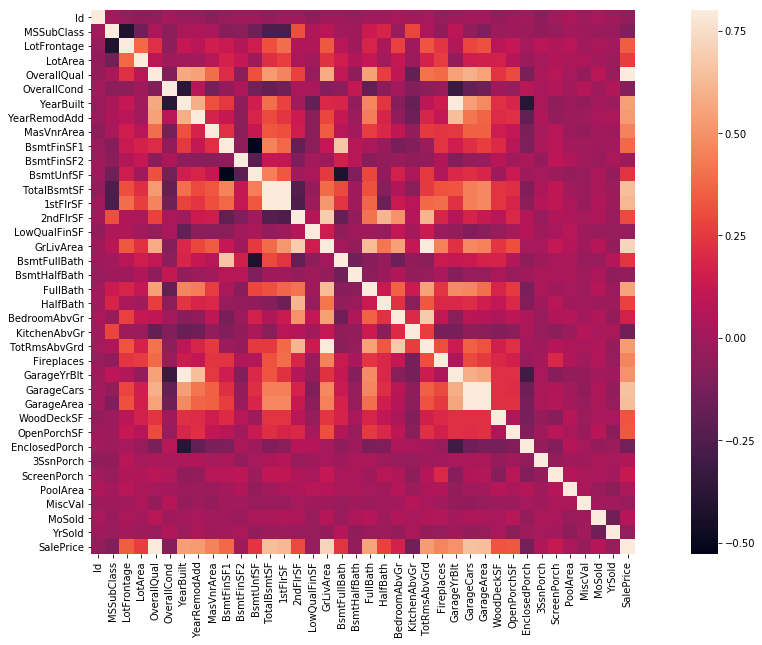

In [22]:
f,ax1=plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,vmax=0.8,square=True,ax=ax1)

In [23]:
print(train_data['Neighborhood'].unique())
print(train_data['CentralAir'].unique())

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Y' 'N']


#### 上述Neighborhood（地段） and CentralAir不是数值类型，所以转化为数值类型 。利用sklearn的preprocessing的LabelEncoder()

In [24]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
data_feature=['Neighborhood','CentralAir']
for x in data_feature:
    train_data[x]=label.fit_transform(train_data[x])
    test_data[x]=label.fit_transform(test_data[x])
train_data[data_feature].head()

,Neighborhood,CentralAir
0,5,1
1,24,1
2,5,1
3,6,1
4,15,1


### 对重新处理好的数据再次画出热度图

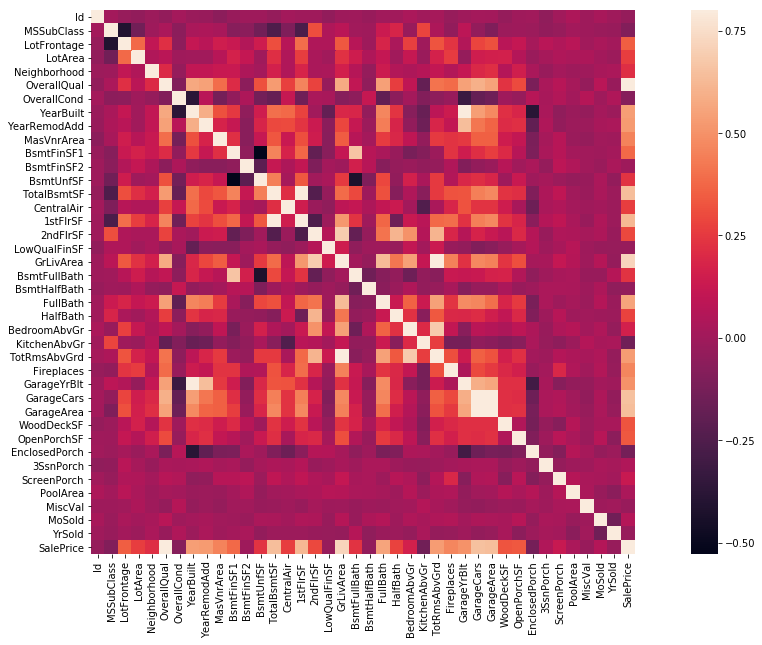

In [25]:
fig,ax1=plt.subplots(figsize=(20,10))
corrmat=train_data.corr()
sns.heatmap(corrmat,vmax=0.8,square=True,ax=ax1)

## 提取主要的特征

In [26]:
#查看corrmat矩阵中的前36与SalePrice的关系
k=36
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(train_data[cols].values.T)   
cm

array([[ 1.        ,  0.80290546,  0.71825715, ..., -0.02520618,
        -0.03395799, -0.03572043],
       [ 0.80290546,  1.        ,  0.5793605 , ..., -0.02418028,
        -0.03512875, -0.04655555],
       [ 0.71825715,  0.5793605 ,  1.        , ..., -0.03010391,
        -0.00442091, -0.0313539 ],
       ...,
       [-0.02520618, -0.02418028, -0.03010391, ...,  1.        ,
         0.00132393, -0.04533024],
       [-0.03395799, -0.03512875, -0.00442091, ...,  0.00132393,
         1.        , -0.01949073],
       [-0.03572043, -0.04655555, -0.0313539 , ..., -0.04533024,
        -0.01949073,  1.        ]])

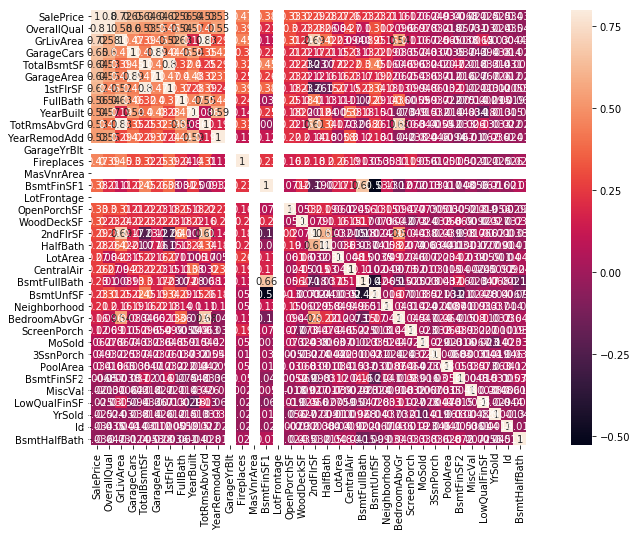

In [27]:
#查看corrmat矩阵中的前36与SalePrice的关系
k=36
fig,ax1=plt.subplots(figsize=(16,8))
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(train_data[cols].values.T)   
sns.heatmap(cm,vmax=0.8,annot=True,square=True,ax=ax1,yticklabels=cols.values,xticklabels=cols.values)

###  上图可以看出与'SalePrice', 最相关的有['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']。OverrallQual,GrlivArea最相关，'GarageCars', 'GarageArea'舍去一个，1stFlrSF 一楼面积这个特征去掉，最后剩下7个特征（除了SalePrice）
     

### 进行主要特征的数据预处理

In [28]:
train_X=train_data[cols[1:-1]]
train_y=train_data[cols[0]]
test_X=test_data[cols[1:-1]]

In [29]:
train_X.isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
GarageArea        0
1stFlrSF          0
FullBath          0
YearBuilt         0
TotRmsAbvGrd      0
YearRemodAdd      0
GarageYrBlt      81
Fireplaces        0
MasVnrArea        8
BsmtFinSF1        0
LotFrontage     259
OpenPorchSF       0
WoodDeckSF        0
2ndFlrSF          0
HalfBath          0
LotArea           0
CentralAir        0
BsmtFullBath      0
BsmtUnfSF         0
Neighborhood      0
BedroomAbvGr      0
ScreenPorch       0
MoSold            0
3SsnPorch         0
PoolArea          0
BsmtFinSF2        0
MiscVal           0
LowQualFinSF      0
YrSold            0
Id                0
dtype: int64

In [30]:
train_X["GarageYrBlt"].fillna(test_X["GarageYrBlt"].mean(), inplace = True)
train_X["LotFrontage"].fillna(test_X["LotFrontage"].mean(), inplace = True)
train_X["MasVnrArea"].fillna(test_X["MasVnrArea"].mean(), inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [31]:
train_X.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
GarageArea      0
1stFlrSF        0
FullBath        0
YearBuilt       0
TotRmsAbvGrd    0
YearRemodAdd    0
GarageYrBlt     0
Fireplaces      0
MasVnrArea      0
BsmtFinSF1      0
LotFrontage     0
OpenPorchSF     0
WoodDeckSF      0
2ndFlrSF        0
HalfBath        0
LotArea         0
CentralAir      0
BsmtFullBath    0
BsmtUnfSF       0
Neighborhood    0
BedroomAbvGr    0
ScreenPorch     0
MoSold          0
3SsnPorch       0
PoolArea        0
BsmtFinSF2      0
MiscVal         0
LowQualFinSF    0
YrSold          0
Id              0
dtype: int64

In [32]:
test_X.isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        1
TotalBsmtSF       1
GarageArea        1
1stFlrSF          0
FullBath          0
YearBuilt         0
TotRmsAbvGrd      0
YearRemodAdd      0
GarageYrBlt      78
Fireplaces        0
MasVnrArea       15
BsmtFinSF1        1
LotFrontage     227
OpenPorchSF       0
WoodDeckSF        0
2ndFlrSF          0
HalfBath          0
LotArea           0
CentralAir        0
BsmtFullBath      2
BsmtUnfSF         1
Neighborhood      0
BedroomAbvGr      0
ScreenPorch       0
MoSold            0
3SsnPorch         0
PoolArea          0
BsmtFinSF2        1
MiscVal           0
LowQualFinSF      0
YrSold            0
Id                0
dtype: int64

In [33]:
test_X["GarageCars"].fillna(test_X["GarageCars"].mean(), inplace = True)
test_X["TotalBsmtSF"].fillna(test_X["TotalBsmtSF"].mean(), inplace = True)
test_X["GarageArea"].fillna(test_X["GarageArea"].mean(), inplace = True)

test_X["MasVnrArea"].fillna(test_X["MasVnrArea"].mean(), inplace = True)
test_X["BsmtFinSF1"].fillna(test_X["BsmtFinSF1"].mean(), inplace = True)

test_X["BsmtFullBath"].fillna(test_X["BsmtFullBath"].mean(), inplace = True)
test_X["BsmtUnfSF"].fillna(test_X["BsmtUnfSF"].mean(), inplace = True)
test_X["BsmtFinSF2"].fillna(test_X["BsmtFinSF2"].mean(), inplace = True)
test_X["GarageYrBlt"].fillna(test_X["GarageYrBlt"].mean(), inplace = True)
test_X["LotFrontage"].fillna(test_X["LotFrontage"].mean(), inplace = True)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
test_X.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
GarageArea      0
1stFlrSF        0
FullBath        0
YearBuilt       0
TotRmsAbvGrd    0
YearRemodAdd    0
GarageYrBlt     0
Fireplaces      0
MasVnrArea      0
BsmtFinSF1      0
LotFrontage     0
OpenPorchSF     0
WoodDeckSF      0
2ndFlrSF        0
HalfBath        0
LotArea         0
CentralAir      0
BsmtFullBath    0
BsmtUnfSF       0
Neighborhood    0
BedroomAbvGr    0
ScreenPorch     0
MoSold          0
3SsnPorch       0
PoolArea        0
BsmtFinSF2      0
MiscVal         0
LowQualFinSF    0
YrSold          0
Id              0
dtype: int64

In [35]:
test_X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd', 'YearRemodAdd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage',
       'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'LotArea',
       'CentralAir', 'BsmtFullBath', 'BsmtUnfSF', 'Neighborhood',
       'BedroomAbvGr', 'ScreenPorch', 'MoSold', '3SsnPorch', 'PoolArea',
       'BsmtFinSF2', 'MiscVal', 'LowQualFinSF', 'YrSold', 'Id'],
      dtype='object')

In [36]:
#去掉Id对数据预测没有用
testID=test_X['Id']
train_X.drop('Id',axis=1,inplace=True)
test_X.drop('Id',axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
test_X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,GarageYrBlt,Fireplaces,MasVnrArea,BsmtFinSF1,LotFrontage,OpenPorchSF,WoodDeckSF,2ndFlrSF,HalfBath,LotArea,CentralAir,BsmtFullBath,BsmtUnfSF,Neighborhood,BedroomAbvGr,ScreenPorch,MoSold,3SsnPorch,PoolArea,BsmtFinSF2,MiscVal,LowQualFinSF,YrSold
0,5,896,1.0,882.0,730.0,896,1,1961,5,1961,1961.0,0,0.0,468.0,80.0,0,140,0,0,11622,1,0.0,270.0,12,2,120,6,0,0,144.0,0,0,2010
1,6,1329,1.0,1329.0,312.0,1329,1,1958,6,1958,1958.0,0,108.0,923.0,81.0,36,393,0,1,14267,1,0.0,406.0,12,3,0,6,0,0,0.0,12500,0,2010
2,5,1629,2.0,928.0,482.0,928,2,1997,6,1998,1997.0,1,0.0,791.0,74.0,34,212,701,1,13830,1,0.0,137.0,8,3,0,3,0,0,0.0,0,0,2010
3,6,1604,2.0,926.0,470.0,926,2,1998,7,1998,1998.0,1,20.0,602.0,78.0,36,360,678,1,9978,1,0.0,324.0,8,3,0,6,0,0,0.0,0,0,2010
4,8,1280,2.0,1280.0,506.0,1280,2,1992,5,1992,1992.0,0,0.0,263.0,43.0,82,0,0,0,5005,1,0.0,1017.0,22,2,144,1,0,0,0.0,0,0,2010


In [38]:
train_X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,GarageYrBlt,Fireplaces,MasVnrArea,BsmtFinSF1,LotFrontage,OpenPorchSF,WoodDeckSF,2ndFlrSF,HalfBath,LotArea,CentralAir,BsmtFullBath,BsmtUnfSF,Neighborhood,BedroomAbvGr,ScreenPorch,MoSold,3SsnPorch,PoolArea,BsmtFinSF2,MiscVal,LowQualFinSF,YrSold
0,7,1710,2,856,548,856,2,2003,8,2003,2003.0,0,196.0,706,65.0,61,0,854,1,8450,1,1,150,5,3,0,2,0,0,0,0,0,2008
1,6,1262,2,1262,460,1262,2,1976,6,1976,1976.0,1,0.0,978,80.0,0,298,0,0,9600,1,0,284,24,3,0,5,0,0,0,0,0,2007
2,7,1786,2,920,608,920,2,2001,6,2002,2001.0,1,162.0,486,68.0,42,0,866,1,11250,1,1,434,5,3,0,9,0,0,0,0,0,2008
3,7,1717,3,756,642,961,1,1915,7,1970,1998.0,1,0.0,216,60.0,35,0,756,0,9550,1,1,540,6,3,0,2,0,0,0,0,0,2006
4,8,2198,3,1145,836,1145,2,2000,9,2000,2000.0,1,350.0,655,84.0,84,192,1053,1,14260,1,1,490,15,4,0,12,0,0,0,0,0,2008


In [39]:
score=[]
name=[]

In [40]:
#数据标准化处理
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
train_X=standard.fit_transform(train_X)
test_X=standard.fit_transform(test_X)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(train_X,train_y,test_size=0.3,random_state=10)

### 进行PCA降维
##### 效果不佳，舍去

In [42]:
#直接降维保存90%的信息
# from sklearn.decomposition import PCA
# pca = PCA(0.9)
# pca.fit(X_train)
# X_train= pca.transform(X_train)
# X_test= pca.transform(X_test)

In [43]:
#先进行噪音降维，再恢复数据原来的维度
# from sklearn.decomposition import PCA
# pca = PCA(n_components=1)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_train = pca.inverse_transform(X_train)
# pca.fit(X_test)
# X_test = pca.transform(X_test)
# X_test = pca.inverse_transform(X_test)

### 线性回归

In [44]:
from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
lr_score=lr_reg.score(X_test,y_test)

In [45]:
name.append('LinearRegression')
score.append(lr_score)
lr_score

0.8521000129710523

### 随机森林

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr_reg=RandomForestRegressor(random_state=10)
rfr_reg.fit(X_train,y_train)
rfr_score=rfr_reg.score(X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
# 集成算法随机森林
name.append('RandomForestRegressor')
score.append(rfr_score)
rfr_score

0.8550719259951656

### SVM

In [48]:
from sklearn.svm import LinearSVR
svm_reg=LinearSVR(loss="squared_epsilon_insensitive")
svm_reg.fit(X_train,y_train)
svm_score=svm_reg.score(X_test,y_test)
name.append('SVM')
score.append(svm_score)
svm_score

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8517130827326044

In [49]:
pd.DataFrame(score,name)

,0
LinearRegression,0.852100
RandomForestRegressor,0.855072
SVM,0.851713


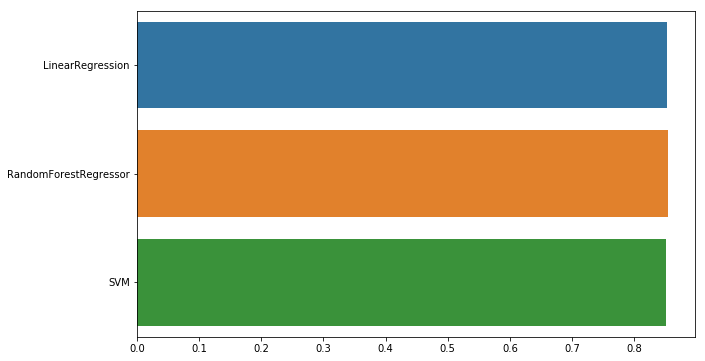

In [50]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x=score,y=name,ax=ax)

### 预测数据 保存

In [51]:
rfr_reg.predict(test_X[0].reshape(1,-1))

array([133680.])

In [52]:
pre=rfr_reg.predict(test_X)

In [53]:
house_price_data = pd.DataFrame({
        "Id": testID,
        "SalePrice": pre
    })
house_price_data.to_csv('house_price_data.csv',index=False)

In [54]:
house_price_data

,Id,SalePrice
0,1461,133680.0
1,1462,156590.0
2,1463,175600.0
3,1464,179450.0
4,1465,207800.0
5,1466,189200.0
6,1467,175690.0
7,1468,178960.0
8,1469,179839.0
9,1470,129055.0
